<a href="https://colab.research.google.com/github/kvnvpham/fatal_force_data/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [3]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Statements

In [29]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [12]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"Household Income Shape: {df_hh_income.shape}\n")
print(f"Pct Below Poverty Level Shape: {df_pct_poverty.shape}\n")
print(f"Pct Over 25 Complete HighSchool Shape: {df_pct_completed_hs.shape}\n")
print(f"Share Race By City Shape: {df_share_race_city.shape}\n")
print(f"Deaths by Police US Shape: {df_fatalities.shape}\n")

Household Income Shape: (29322, 3)

Pct Below Poverty Level Shape: (29329, 3)

Pct Over 25 Complete HighSchool Shape: (29329, 3)

Share Race By City Shape: (29268, 7)

Deaths by Police US Shape: (2535, 14)



In [ ]:
print(f"Household Income Columns: {df_hh_income.columns}\n")
print(f"Pct Below Poverty Level Columns: {df_pct_poverty.columns}\n")
print(f"Pct Over 25 Complete HighSchool Columns: {df_pct_completed_hs.columns}\n")
print(f"Share Race By City Columns: {df_share_race_city.columns}\n")
print(f"Deaths by Police US Columns: {df_fatalities.columns}\n")

Household Income Columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Pct Below Poverty Level Columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Pct Over 25 Complete HighSchool Columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Share Race By City Columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Deaths by Police US Columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')



In [ ]:
print(f"Household Income - NaN: {df_hh_income.isna().values.any()}, Duplicates: {df_hh_income.duplicated().any()}\n")
print(f"Pct Below Poverty Level - NaN: {df_pct_poverty.isna().values.any()}, Duplicates: {df_pct_poverty.duplicated().any()}\n")
print(f"Pct Over 25 Complete HighSchool - NaN: {df_pct_completed_hs.isna().values.any()}, Duplicates: {df_pct_completed_hs.duplicated().any()}\n")
print(f"Share Race By City - NaN: {df_share_race_city.isna().values.any()}, Duplicates: {df_share_race_city.duplicated().any()}\n")
print(f"Deaths by Police US - NaN: {df_fatalities.isna().values.any()}, Duplicates: {df_fatalities.duplicated().any()}\n")

Household Income - NaN: True, Duplicates: False

Pct Below Poverty Level - NaN: False, Duplicates: False

Pct Over 25 Complete HighSchool - NaN: False, Duplicates: False

Share Race By City - NaN: False, Duplicates: False

Deaths by Police US - NaN: True, Duplicates: False



## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_clean_pov_rate = df_pct_poverty[df_pct_poverty.poverty_rate != "-"]

In [ ]:
df_clean_pov_rate.poverty_rate = pd.to_numeric(df_clean_pov_rate.poverty_rate)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
state_pov = df_clean_pov_rate.groupby("Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})
state_pov = state_pov.sort_values("poverty_rate", ascending=False)
state_pov[:10]

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


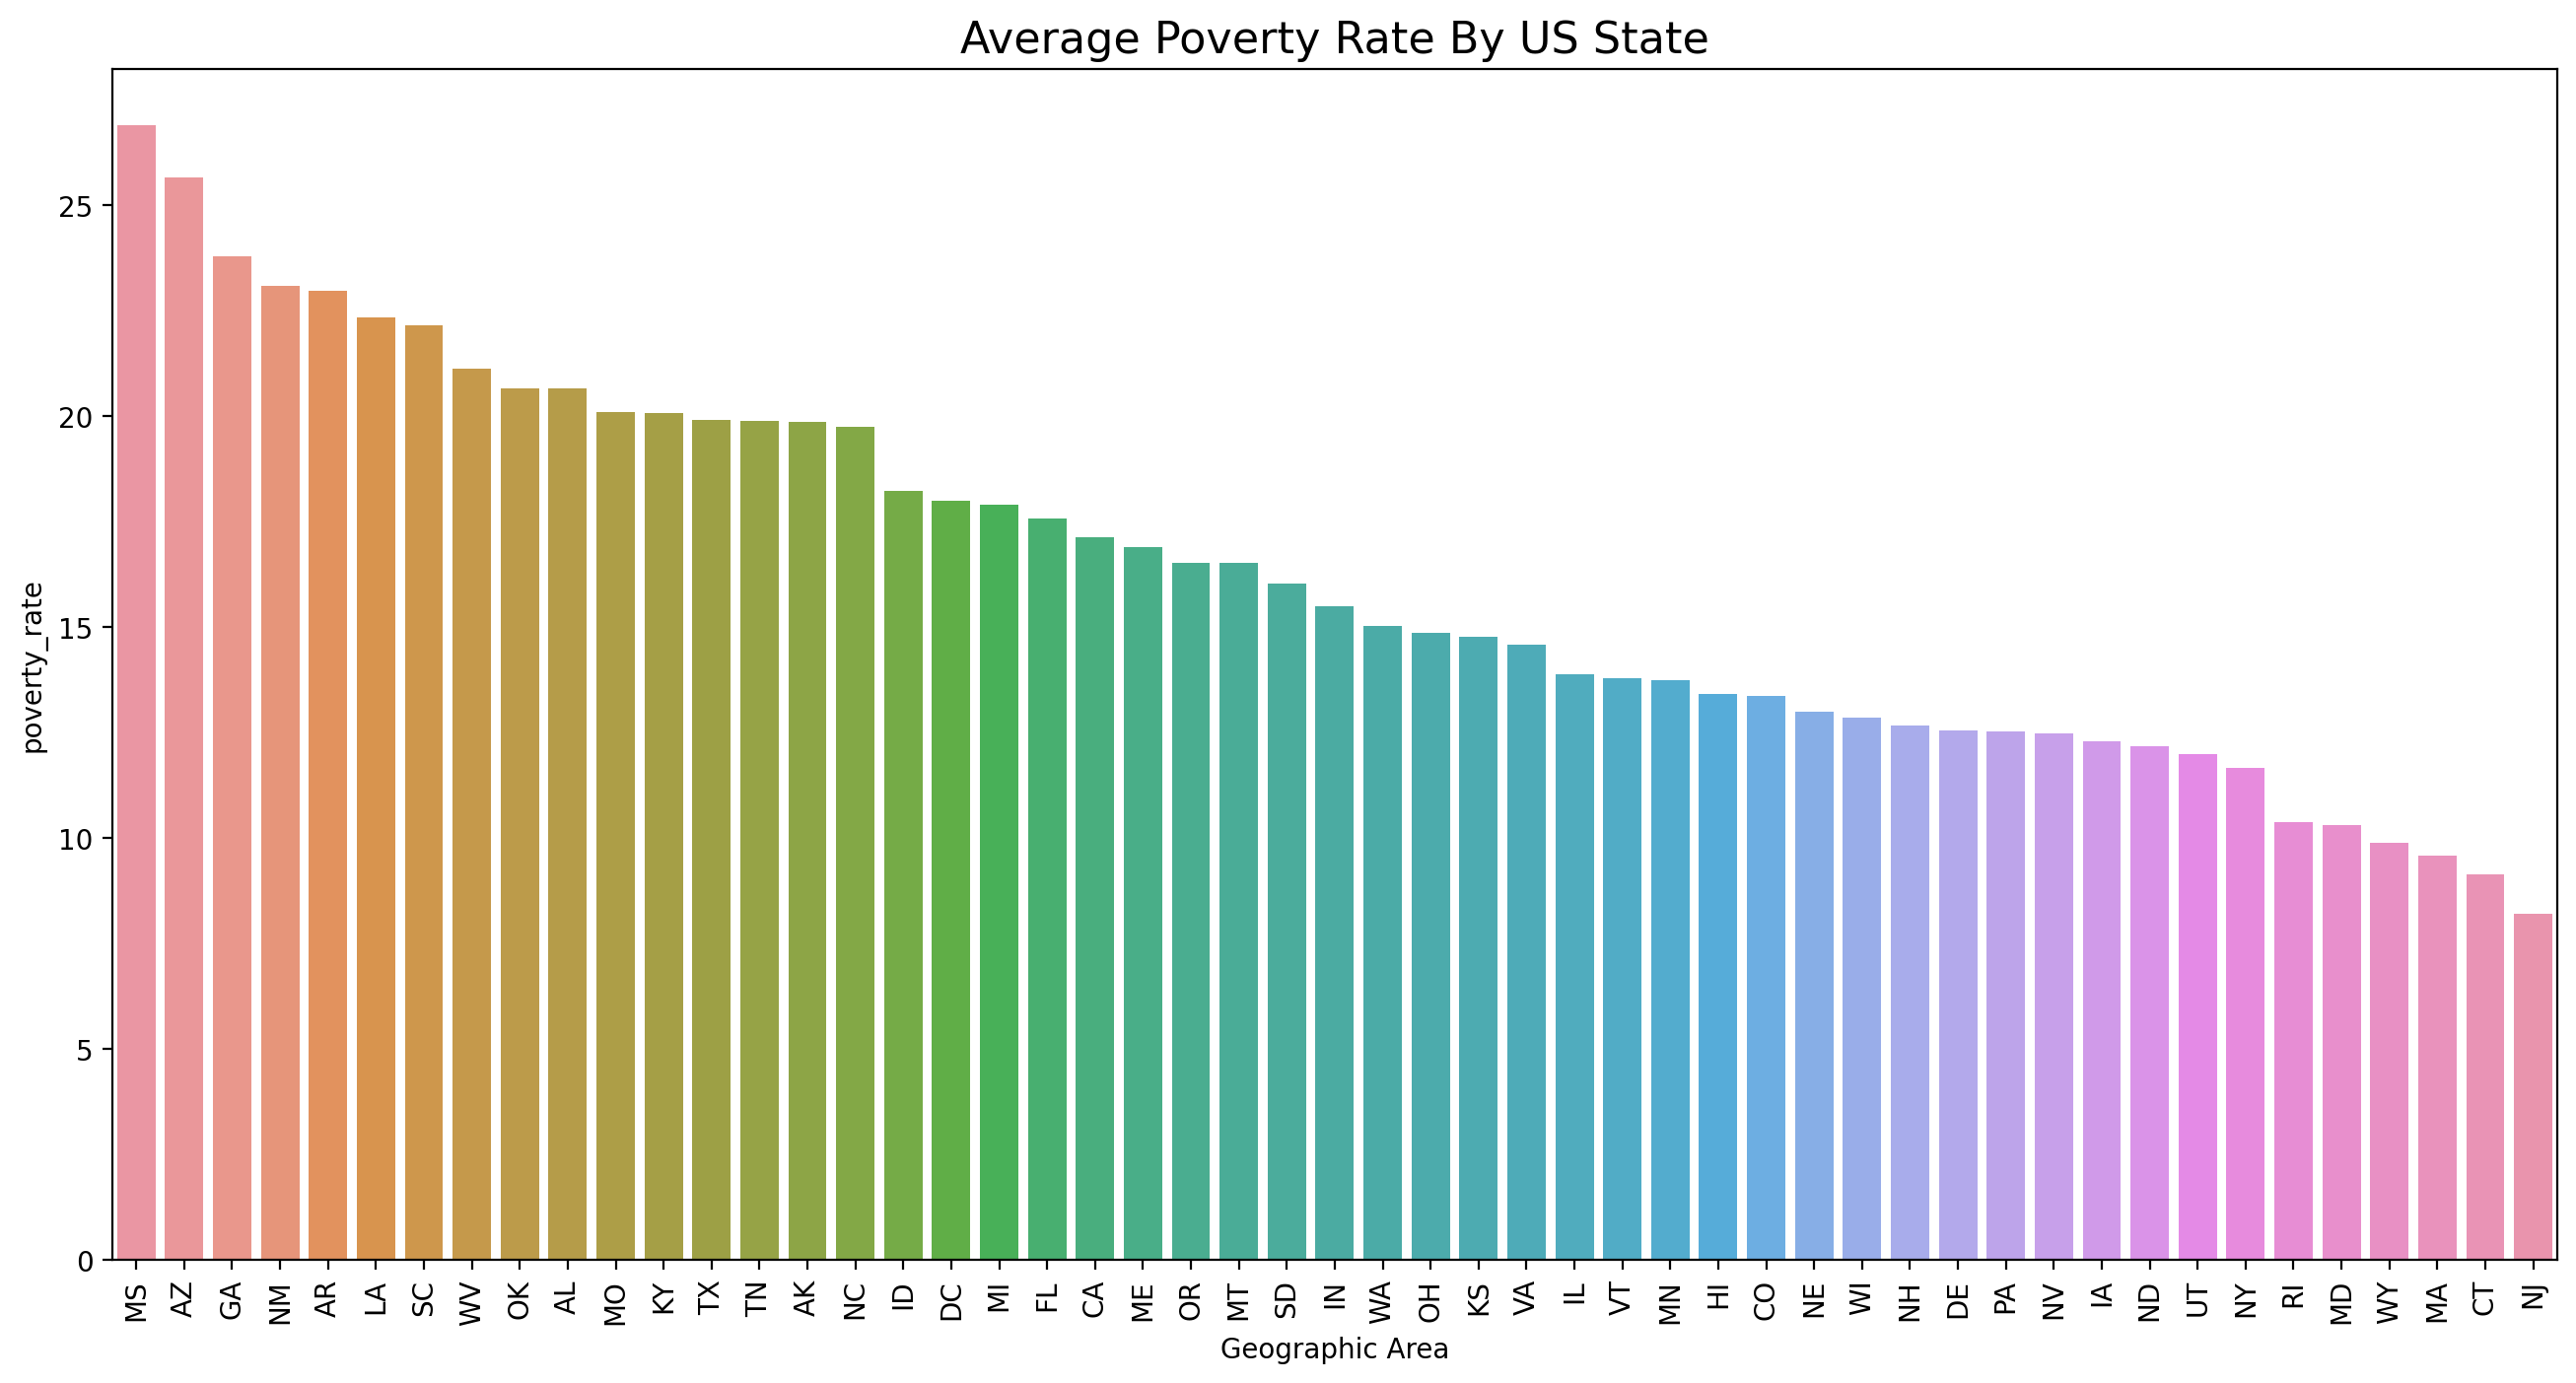

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Average Poverty Rate By US State", fontsize=16)

plt.xticks(rotation=90)

state_bar = sns.barplot(data=state_pov,
                        x="Geographic Area",
                        y="poverty_rate",)
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_hs = df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs != "-"]

In [ ]:
df_hs.percent_completed_hs = pd.to_numeric(df_hs.percent_completed_hs)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
state_hs = df_hs.groupby("Geographic Area").agg({"percent_completed_hs": pd.Series.mean})
state_hs.sort_values("percent_completed_hs", ascending=False, inplace=True)
state_hs.reset_index(inplace=True)
state_hs[:10]

,Geographic Area,percent_completed_hs
0,MA,92.40
1,WY,92.10
2,HI,91.67
3,UT,91.62
4,CT,91.59
5,ME,91.43
6,NJ,90.85
7,NH,90.71
8,NY,90.61
9,MT,90.49


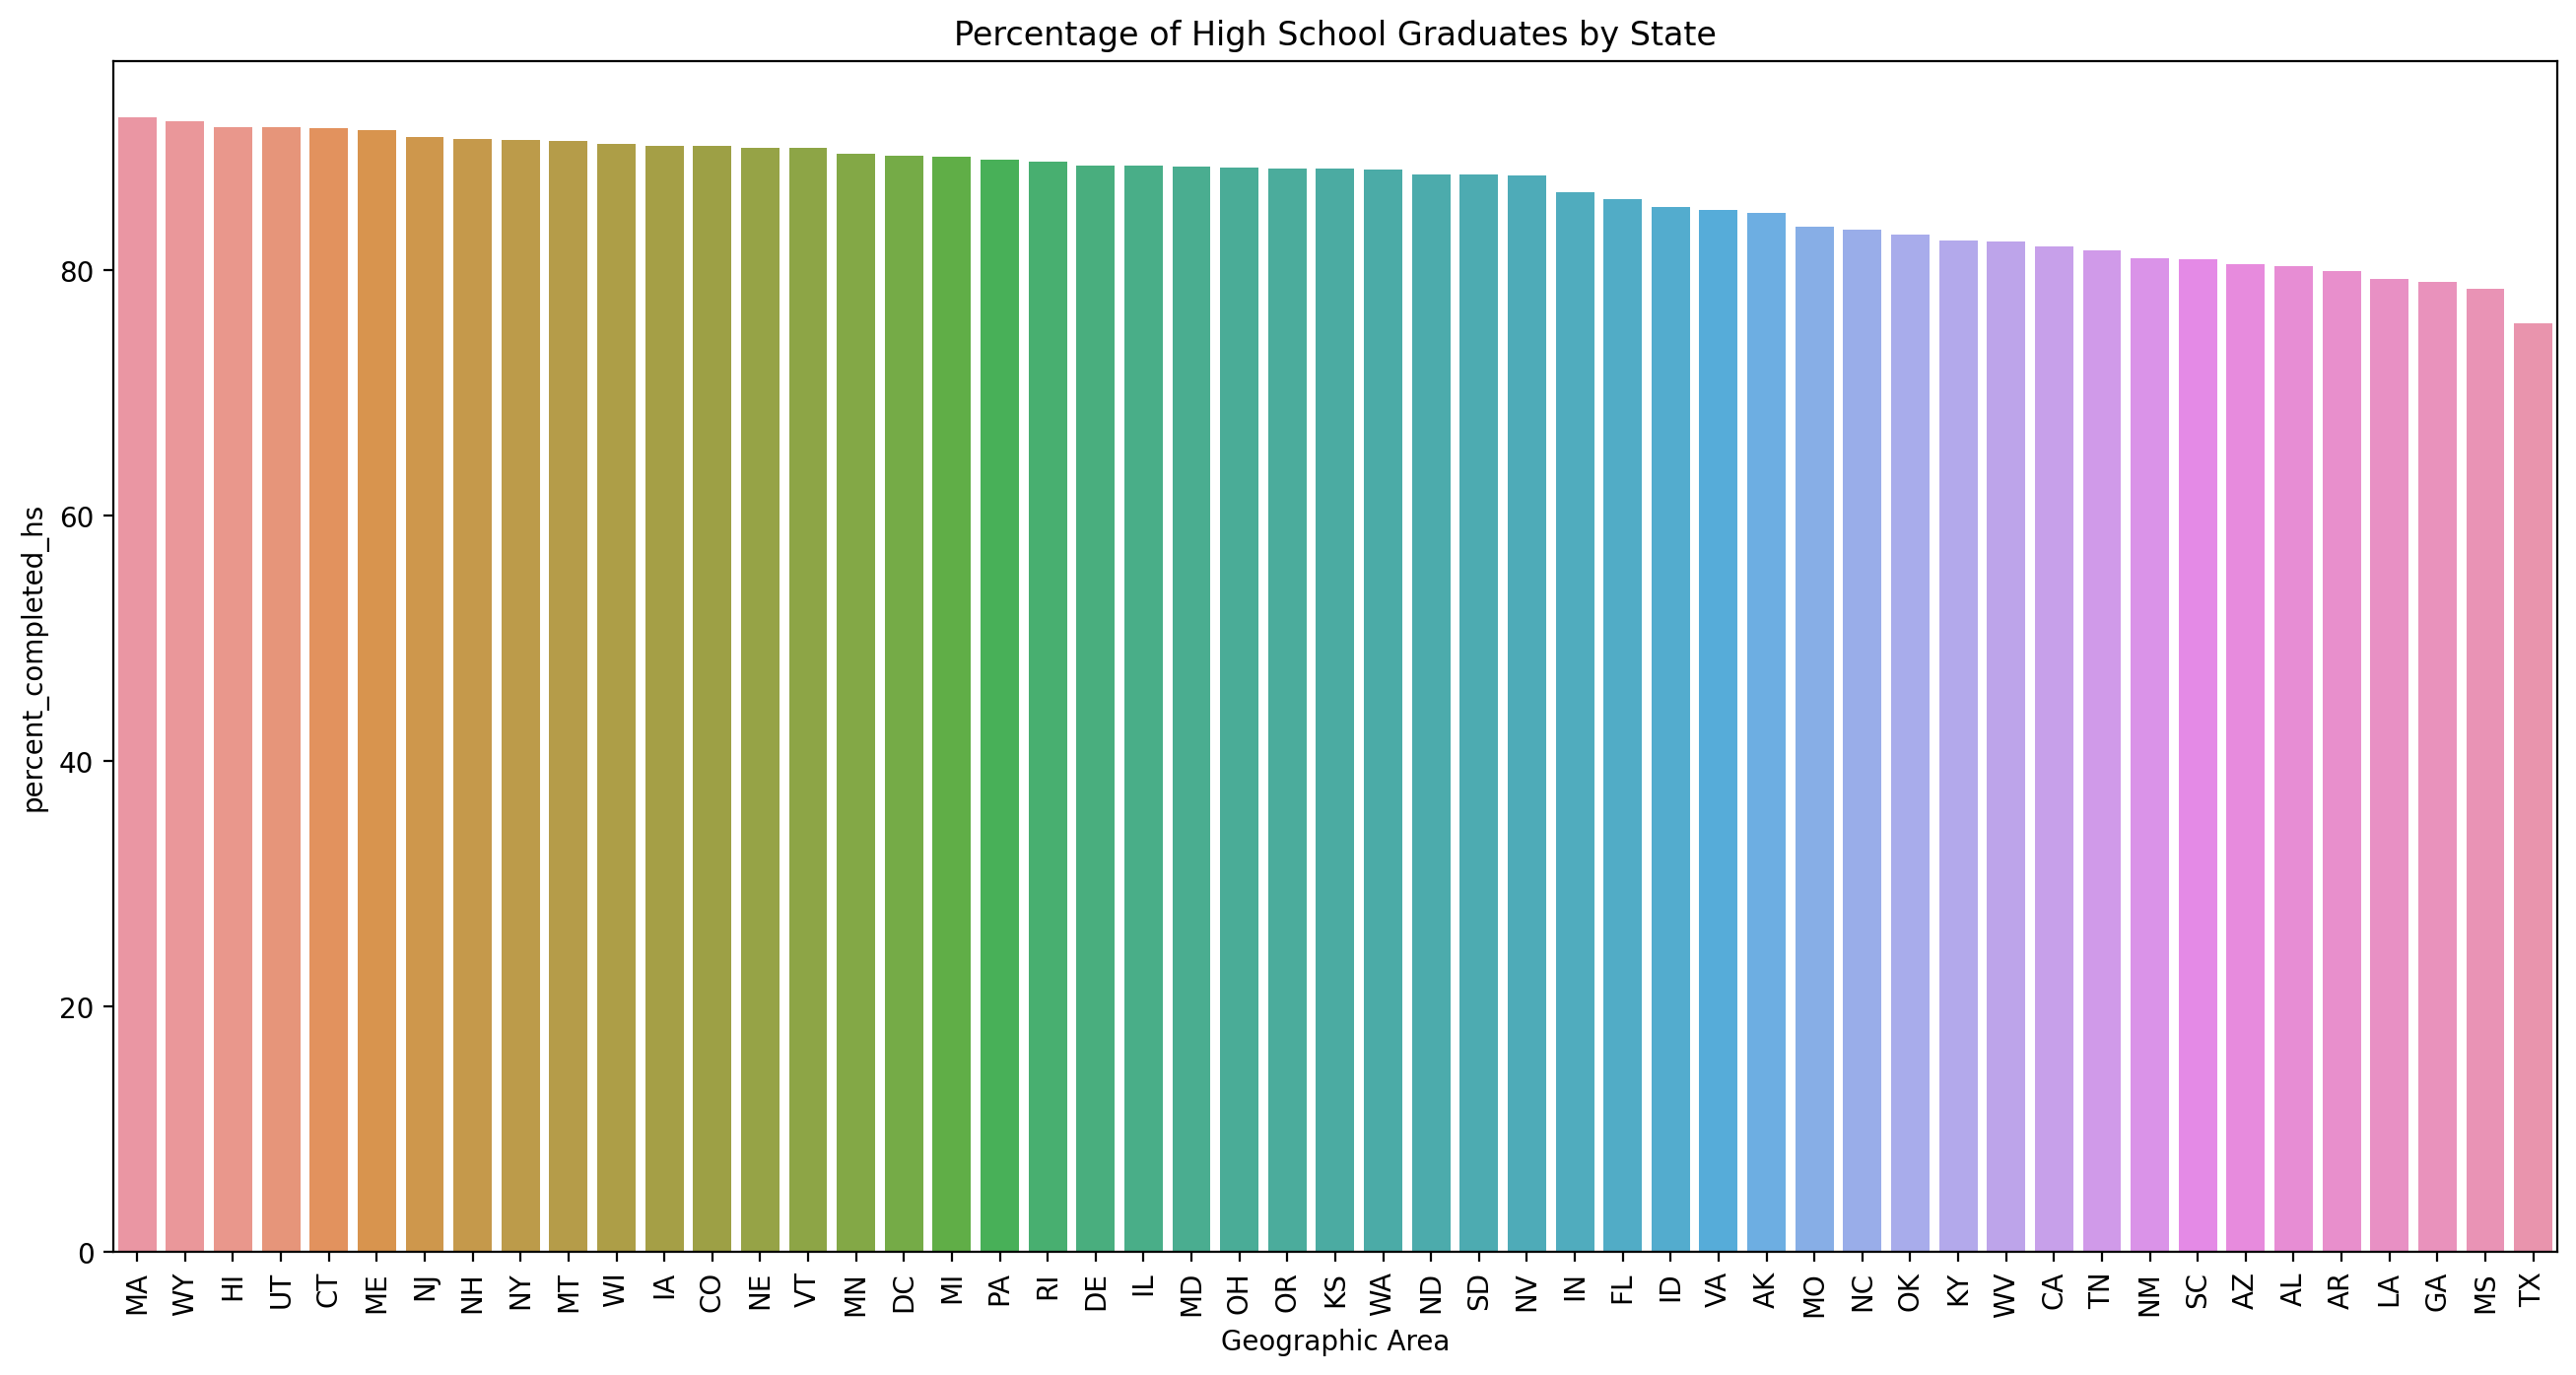

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Percentage of High School Graduates by State")

plt.xticks(rotation=90)

hs_bar = sns.barplot(data=state_hs,
                     x="Geographic Area",
                     y="percent_completed_hs")
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
merged_pov_hs = pd.merge(state_pov, state_hs, on="Geographic Area")
merged_pov_hs[:10]

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.67,80.47
2,GA,23.78,79.01
3,NM,23.08,80.98
4,AR,22.96,79.95
5,LA,22.34,79.29
6,SC,22.16,80.85
7,WV,21.13,82.35
8,OK,20.66,82.91
9,AL,20.65,80.30


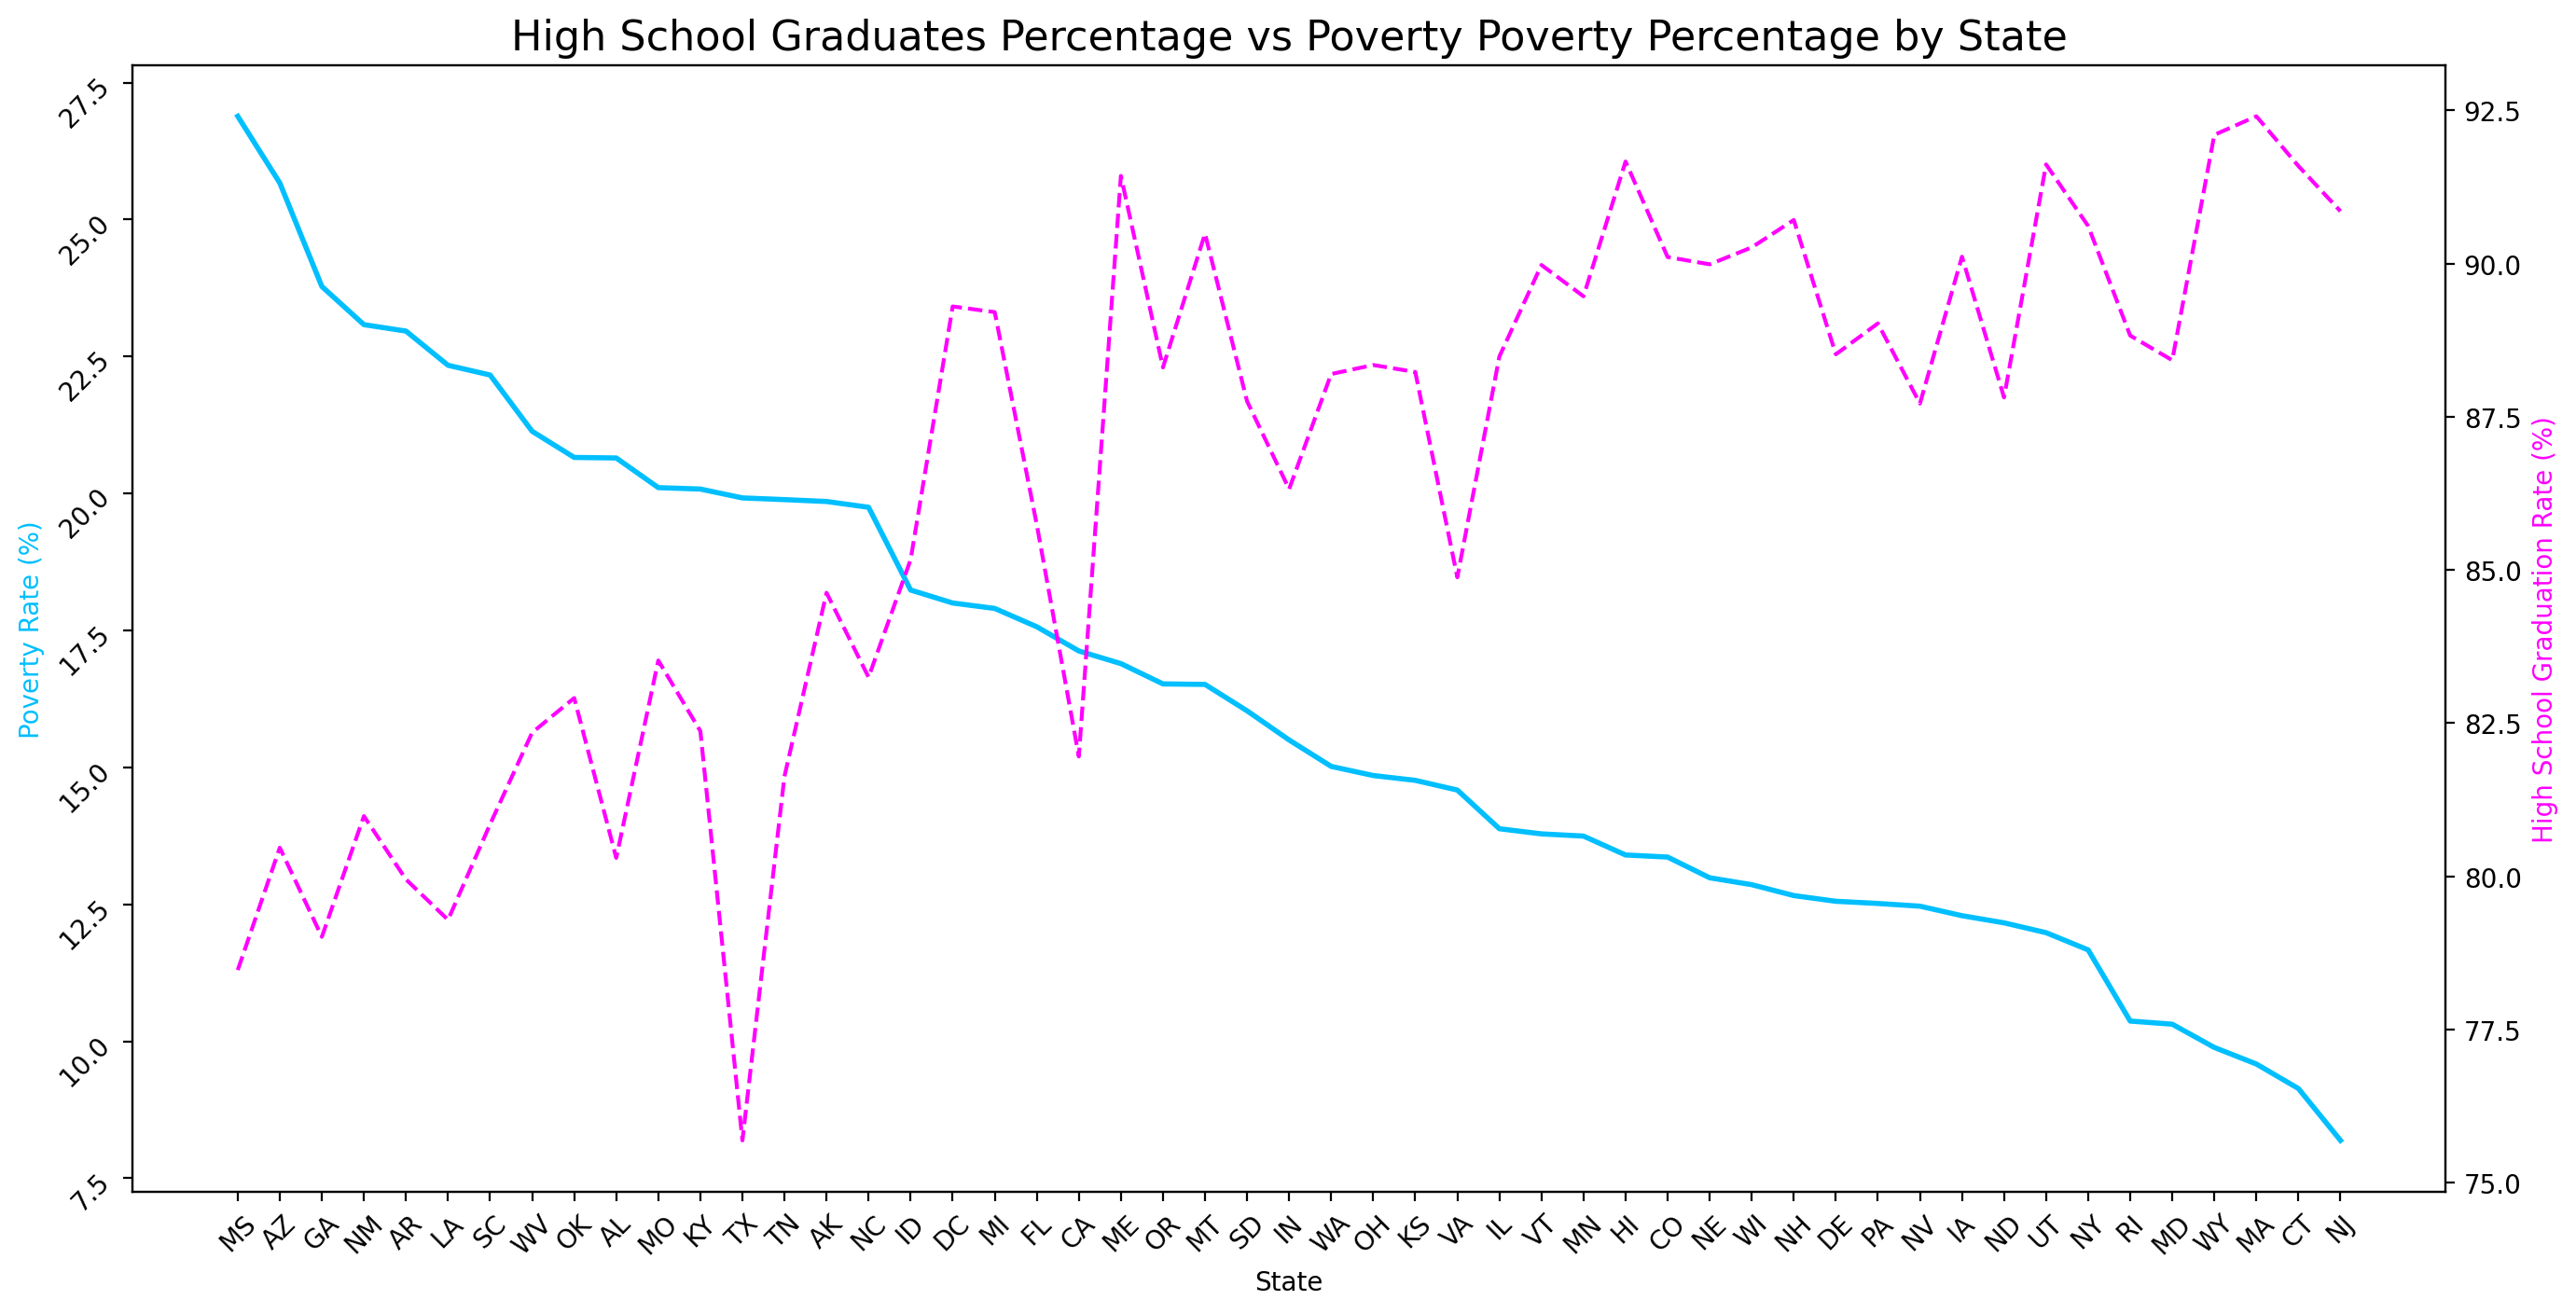

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("High School Graduates Percentage vs Poverty Poverty Percentage by State",
          fontsize=16)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("State")
ax1.tick_params(rotation=45)
ax1.set_ylabel("Poverty Rate (%)", color="deepskyblue")
ax2.set_ylabel("High School Graduation Rate (%)", color="fuchsia")

ax1.plot(merged_pov_hs["Geographic Area"], merged_pov_hs["poverty_rate"], color="deepskyblue", linewidth=2)
ax2.plot(merged_pov_hs["Geographic Area"], merged_pov_hs["percent_completed_hs"], color="fuchsia", linestyle="--")

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

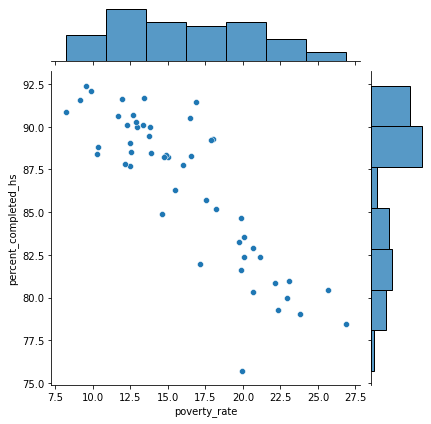

In [ ]:
pov_to_hs = sns.jointplot(data=merged_pov_hs,
                          x="poverty_rate",
                          y="percent_completed_hs",
                          kind="scatter")

plt.show()

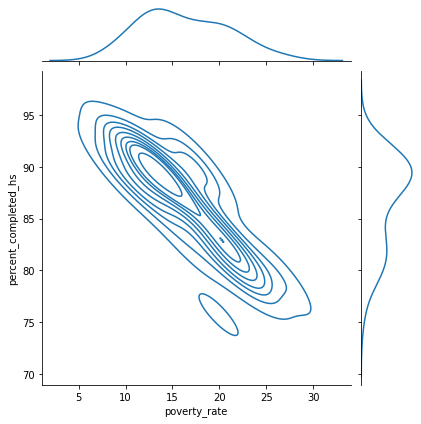

In [ ]:
pov_to_hs = sns.jointplot(data=merged_pov_hs,
                          x="poverty_rate",
                          y="percent_completed_hs",
                          kind="kde")

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

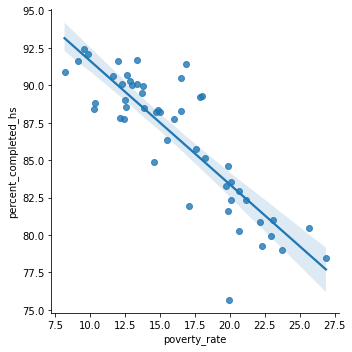

In [ ]:
pov_hs_lmplot = sns.lmplot(data=merged_pov_hs,
                           x="poverty_rate",
                           y="percent_completed_hs")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
df_share_race_city[df_share_race_city["Geographic area"] == "TX"]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
24475,TX,Abbott city,96.1,2,1.1,0.3,6.5
24476,TX,Abernathy city,79.9,2.5,0.7,0.1,47.7
24477,TX,Abilene city,75.5,9.6,0.7,1.7,24.5
24478,TX,Abram CDP,99.3,0.1,0,0,99.3
24479,TX,Ackerly city,84.5,0,1.8,0,49.1
...,...,...,...,...,...,...,...
26222,TX,Zapata CDP,92.4,0,0.1,0.2,95
26223,TX,Zapata Ranch CDP,85.2,0,0,0,98.1
26224,TX,Zarate CDP,100,0,0,0,100
26225,TX,Zavalla city,97.1,0.7,0.7,0,1.4


In [ ]:
df_race_clean = df_share_race_city[df_share_race_city.share_white != "(X)"]

In [ ]:
df_race_clean[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]] = df_race_clean[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_race_clean = df_race_clean.groupby("Geographic area", as_index=False).mean()
df_race_clean[:10]

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [ ]:
state_race = px.bar(df_race_clean,
                    x="Geographic area",
                    y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
                    barmode="overlay",
                    title="Percentage of Races In Each US State")
state_race.update_layout(yaxis_title="Percentage",
                         xaxis_title="State")
state_race.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
fatalities = df_fatalities.race.value_counts()
fatalities

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [ ]:
race_fatalities = pd.DataFrame(fatalities.values,
                               index=["White", "Black", "Hispanic", "Asian", "Native American", "Other"],
                               columns=["Ethnicity"])
race_fatalities

,Ethnicity
White,1201
Black,618
Hispanic,423
Asian,39
Native American,31
Other,28


In [ ]:
donut_fatality = px.pie(race_fatalities,
                        names=race_fatalities.index,
                        values="Ethnicity",
                        hole=0.4,
                        title="Fatalities by Race")
donut_fatality.update_traces(textposition="inside", 
                             textinfo="percent+label")
donut_fatality.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
gender_fatalities = df_fatalities.gender.value_counts()
gender_fatalities

M    2428
F     107
Name: gender, dtype: int64

In [ ]:
gender_fatalities = pd.DataFrame(gender_fatalities.values,
                                 index=["Male", "Female"],
                                 columns=["Count"])
gender_fatalities

,Count
Male,2428
Female,107


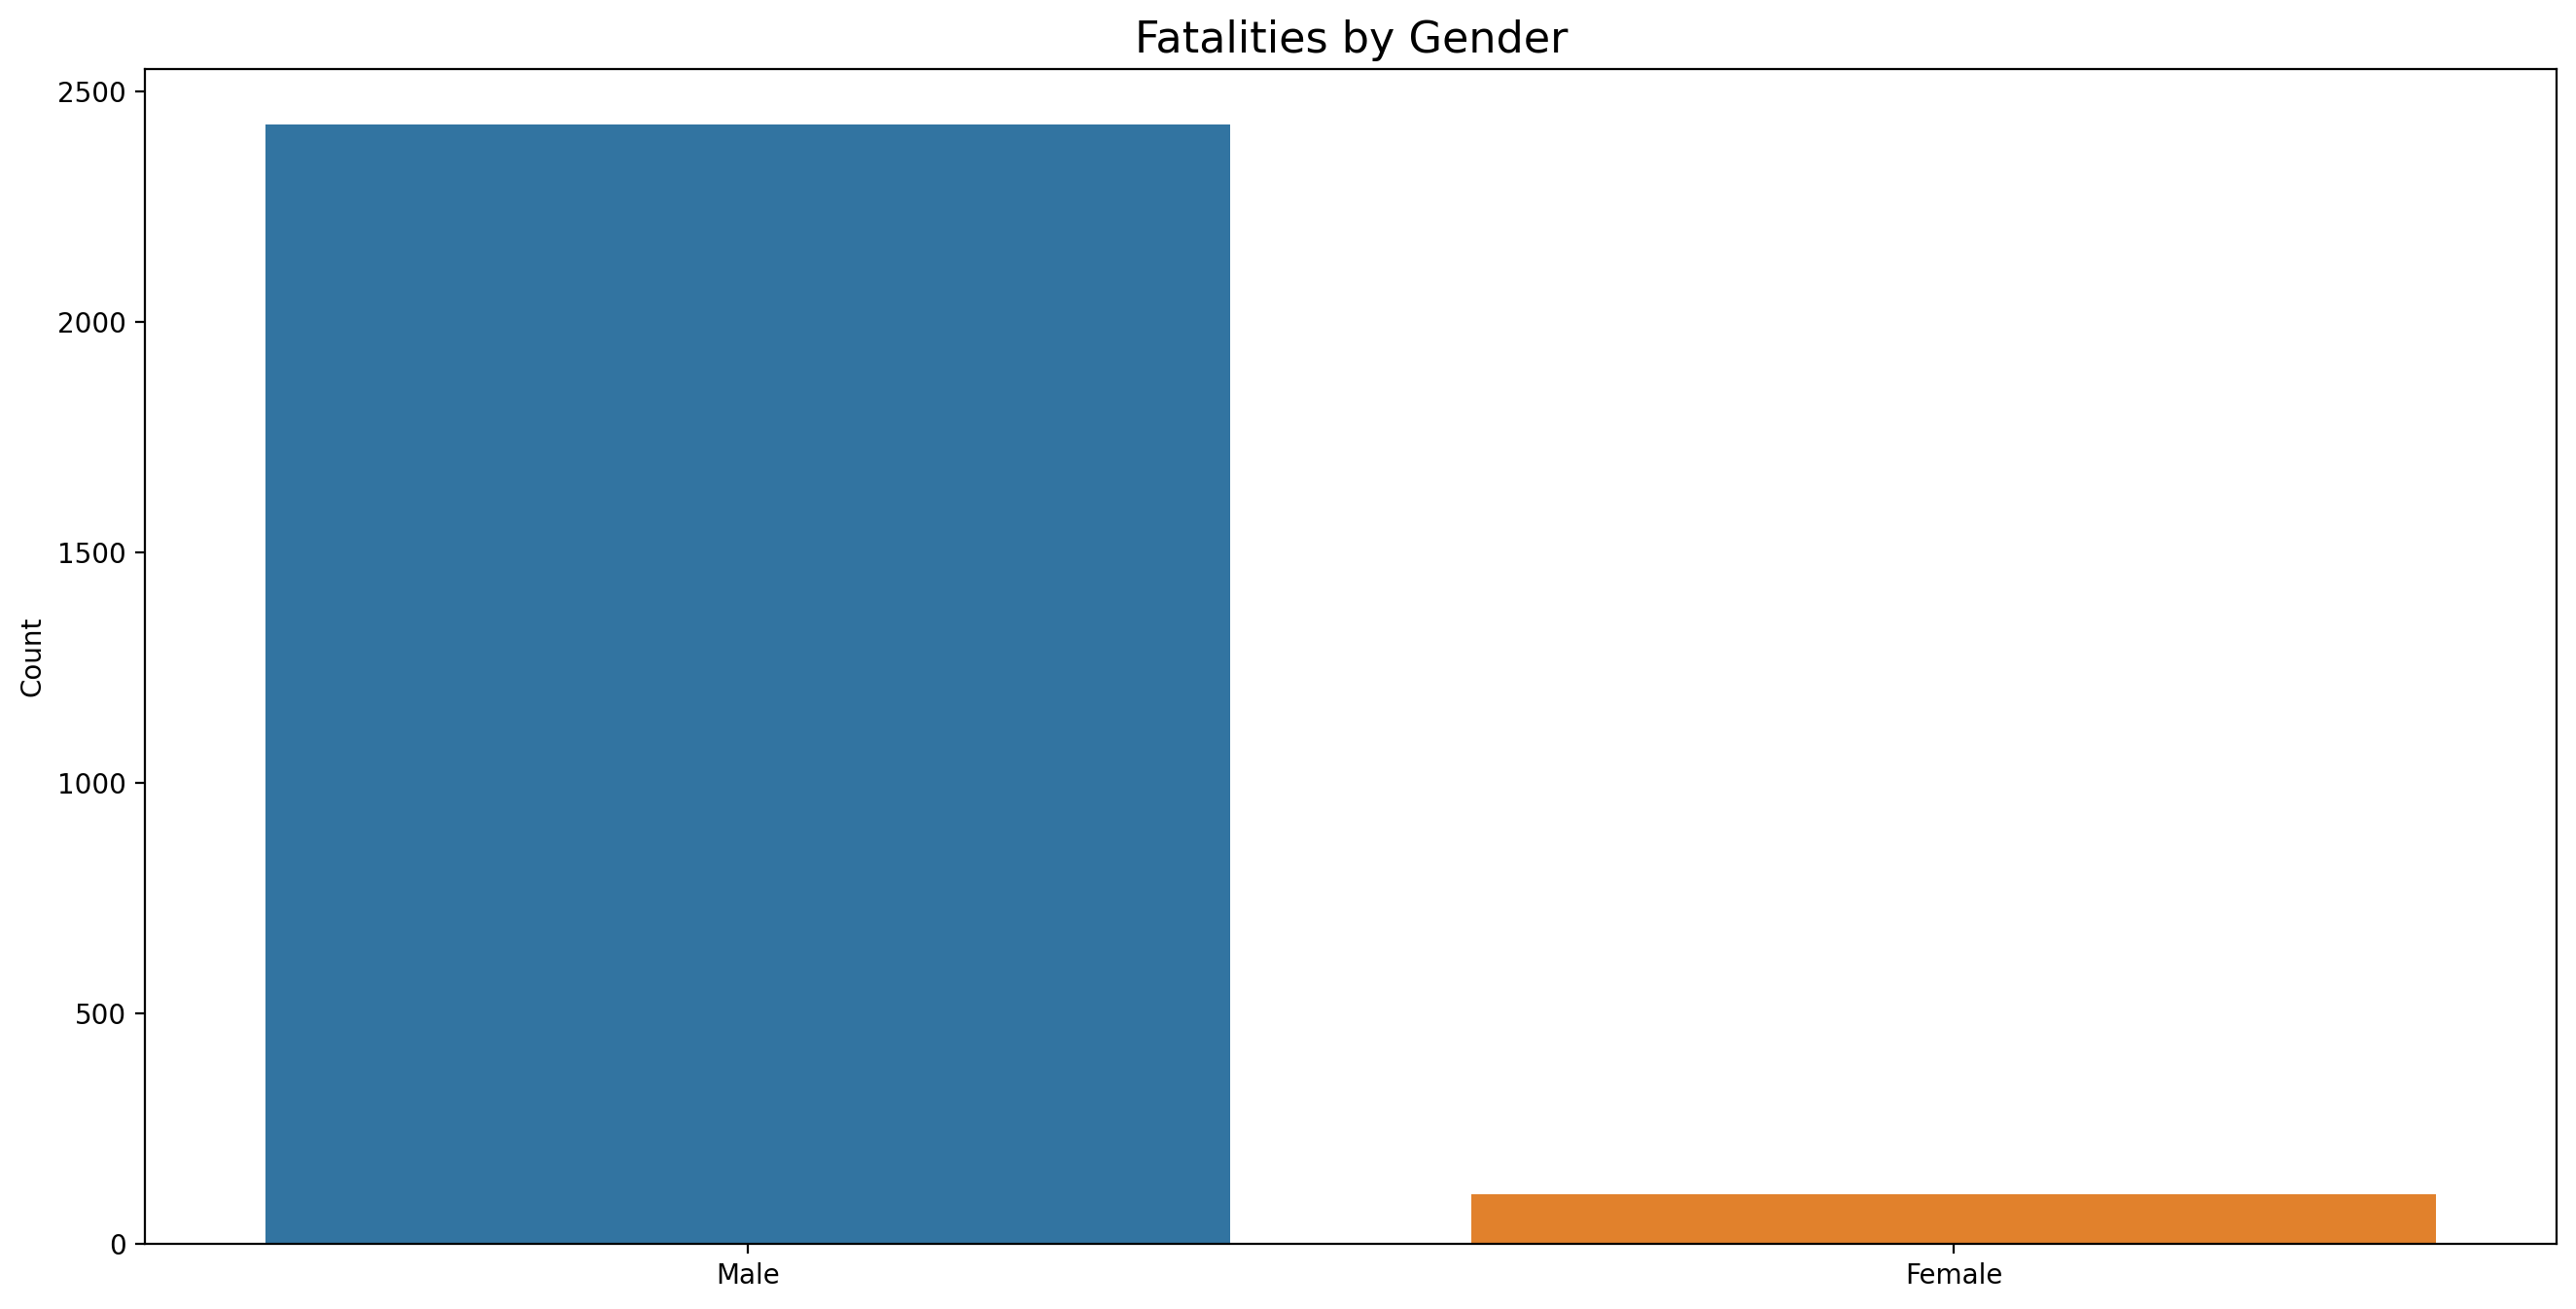

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Fatalities by Gender", fontsize=16)

gender_fatal = sns.barplot(data=gender_fatalities,
                       x=gender_fatalities.index,
                       y="Count")
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df_fatalities.manner_of_death.nunique()

2

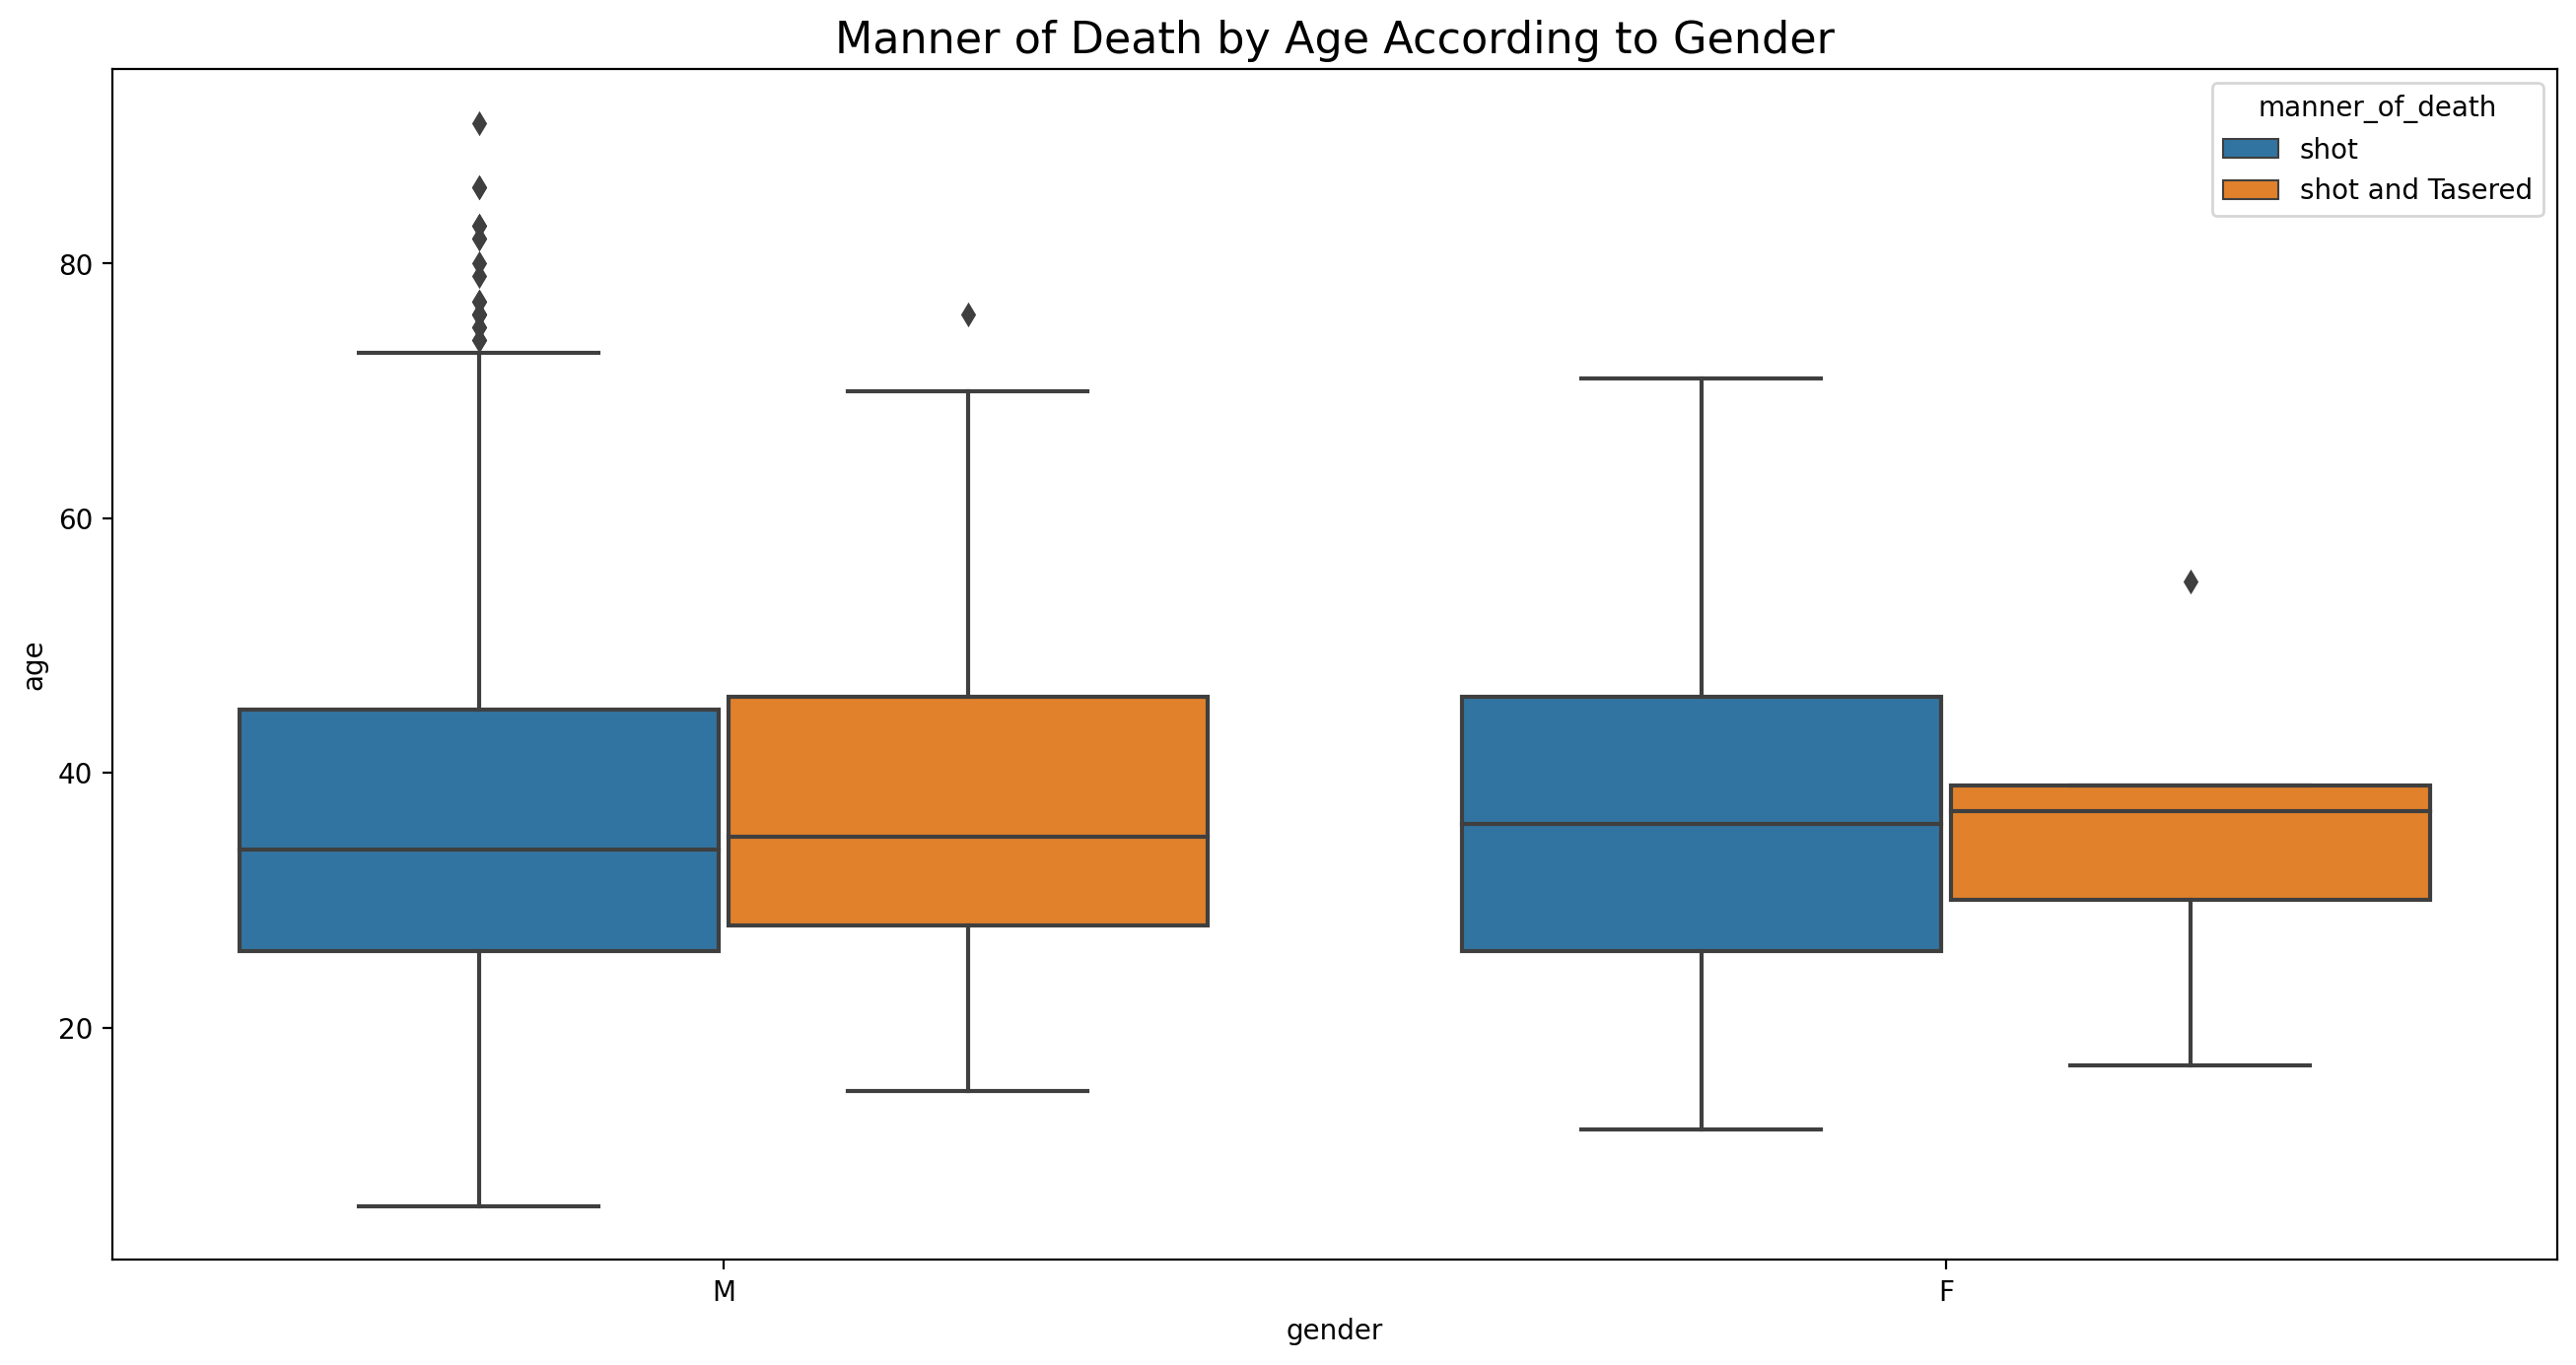

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Manner of Death by Age According to Gender", fontsize=16)

gender_manner = sns.boxplot(data=df_fatalities,
                            x="gender",
                            y="age",
                            hue="manner_of_death")
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
armed_status_count = df_fatalities.armed.value_counts()
armed_status_count

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

In [ ]:
armed = df_fatalities[df_fatalities.armed != "unarmed"]
total_people = df_fatalities.armed.count()

In [ ]:
total_armed = armed.armed.value_counts().sum()

print(f"Number of People Armed: {total_armed}\n")
print(f"Total Number of People: {total_people}\n")
print(f"Percentage of People Armed: {((total_armed/total_people)*100):.4}%")

Number of People Armed: 2355

Total Number of People: 2526

Percentage of People Armed: 93.23%


In [ ]:
armed_gun = df_fatalities[df_fatalities.armed == "gun"]
unarmed = df_fatalities[df_fatalities.armed == "unarmed"]

print(f"Total Armed People: {armed_gun.armed.count()}\n")
print(f"Total Unarmed People: {unarmed.armed.count()}")

Total Armed People: 1398

Total Unarmed People: 171


In [ ]:
armed_bar = px.bar(armed_status_count,
                   x=armed_status_count.index,
                   y=armed_status_count.values,
                   title="Number of Deaths by Armed Status")
armed_bar.update_layout(yaxis_title="Count",
                        xaxis_title="Weapon")
armed_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
total_age = df_fatalities.age.count()

In [ ]:
under_25 = df_fatalities[df_fatalities.age < 25]
under_25_count = under_25.age.count()

f"Percentage of Fatalities Age Under 25: {((under_25_count/total_age)*100):.4}%"

'Percentage of Fatalities Age Under 25: 18.31%'

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

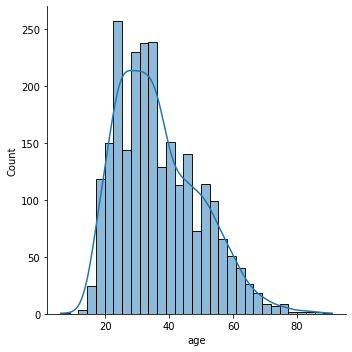

In [ ]:
age_dis = sns.displot(data=df_fatalities,
                       x="age",
                       kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

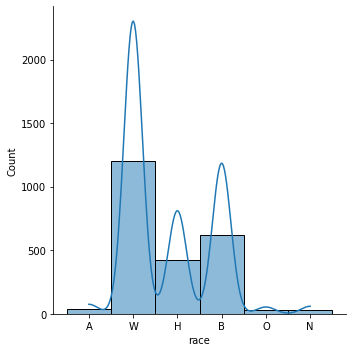

In [ ]:
race_dis = sns.displot(data=df_fatalities,
                       x="race",
                       kde=True)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
#Fatalities df from previous donut chart

bar_by_race = px.bar(race_fatalities,
                     x=race_fatalities.index,
                     y="Ethnicity",
                     title="Fatalities By Ethnicity")
bar_by_race.update_layout(yaxis_title="Count",
                          xaxis_title="Ethnicity")
bar_by_race.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
total_ill = df_fatalities.signs_of_mental_illness.count()

In [ ]:
true_ill = df_fatalities[df_fatalities.signs_of_mental_illness == True]
total_true_ill = true_ill.signs_of_mental_illness.count()

f"Total Percentage with Mental Illness: {((total_true_ill/total_ill)*100):.4}%"

'Total Percentage with Mental Illness: 24.97%'

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
cities = df_fatalities.city.value_counts()

In [ ]:
top_10_cities = pd.DataFrame(cities.values,
                          index=cities.index,
                          columns=["count"])[:10]
top_10_cities

,count
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Austin,18
Miami,18
St. Louis,15


In [ ]:
top_cities_fatal = px.bar(top_10_cities,
                          x=top_10_cities.index,
                          y="count",
                          title="Top 10 Cities with Fatalities")
top_cities_fatal.update_layout(yaxis_title="Number of Deaths",
                               xaxis_title="City")
top_cities_fatal.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
deaths_city_race = df_fatalities.groupby(["city", "race"], as_index=False).agg({"name": pd.Series.count})
deaths_city_race.columns = ["city", "ethnicity", "count"]

In [ ]:
top_10_cities.reset_index(inplace=True)
top_10_cities.columns = ["city", "count"]
top_10_cities

,city,count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


In [ ]:
merge_top_cities = pd.merge(deaths_city_race, top_10_cities, on="city")
merge_top_cities = merge_top_cities[["city", "ethnicity", "count_x"]]
merge_top_cities.columns = ["city", "ethnicity", "count"]
merge_top_cities[:10]

,city,ethnicity,count
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,B,21
4,Chicago,H,1
5,Chicago,W,2
6,Columbus,B,11
7,Columbus,O,1
8,Columbus,W,6
9,Houston,A,1


In [ ]:
top_cities_bar = px.bar(merge_top_cities,
                        x="city",
                        y="count",
                        color="ethnicity",
                        barmode="overlay")
top_cities_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
num_deaths_by_state = df_fatalities.state.value_counts()

deaths_by_state = pd.DataFrame(num_deaths_by_state.values,
                               index=num_deaths_by_state.index,
                               columns=["count"])
deaths_by_state.reset_index(inplace=True)
deaths_by_state.columns = ["state", "count"]
deaths_by_state

,state,count
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [ ]:
state_fatality = px.choropleth(deaths_by_state,
                               locations="state",
                               locationmode="USA-states",
                               color="count",
                               color_continuous_scale="matter")
state_fatality.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

In [14]:
deaths_time = df_fatalities.date.value_counts()
deaths_time_df = pd.DataFrame(deaths_time.values,
                              index=deaths_time.index,
                              columns=["count"])
deaths_time_df.reset_index(inplace=True)
deaths_time_df.columns = ["date", "count"]
deaths_time_df.sort_values("date", inplace=True)
deaths_time_df

,date,count
430,2015-01-03,3
677,2015-01-04,2
736,2015-01-06,1
604,2015-01-07,2
610,2015-01-08,2
...,...,...
538,2017-12-03,2
702,2017-12-04,1
237,2017-12-05,4
239,2017-12-06,4


In [15]:
deaths_time_df = deaths_time_df.resample("M", on="date").sum()
deaths_time_df

,count
date,
2015-01-31,70
2015-02-28,78
2015-03-31,87
2015-04-30,88
2015-05-31,85
2015-06-30,68
2015-07-31,85
2015-08-31,86
2015-09-30,90


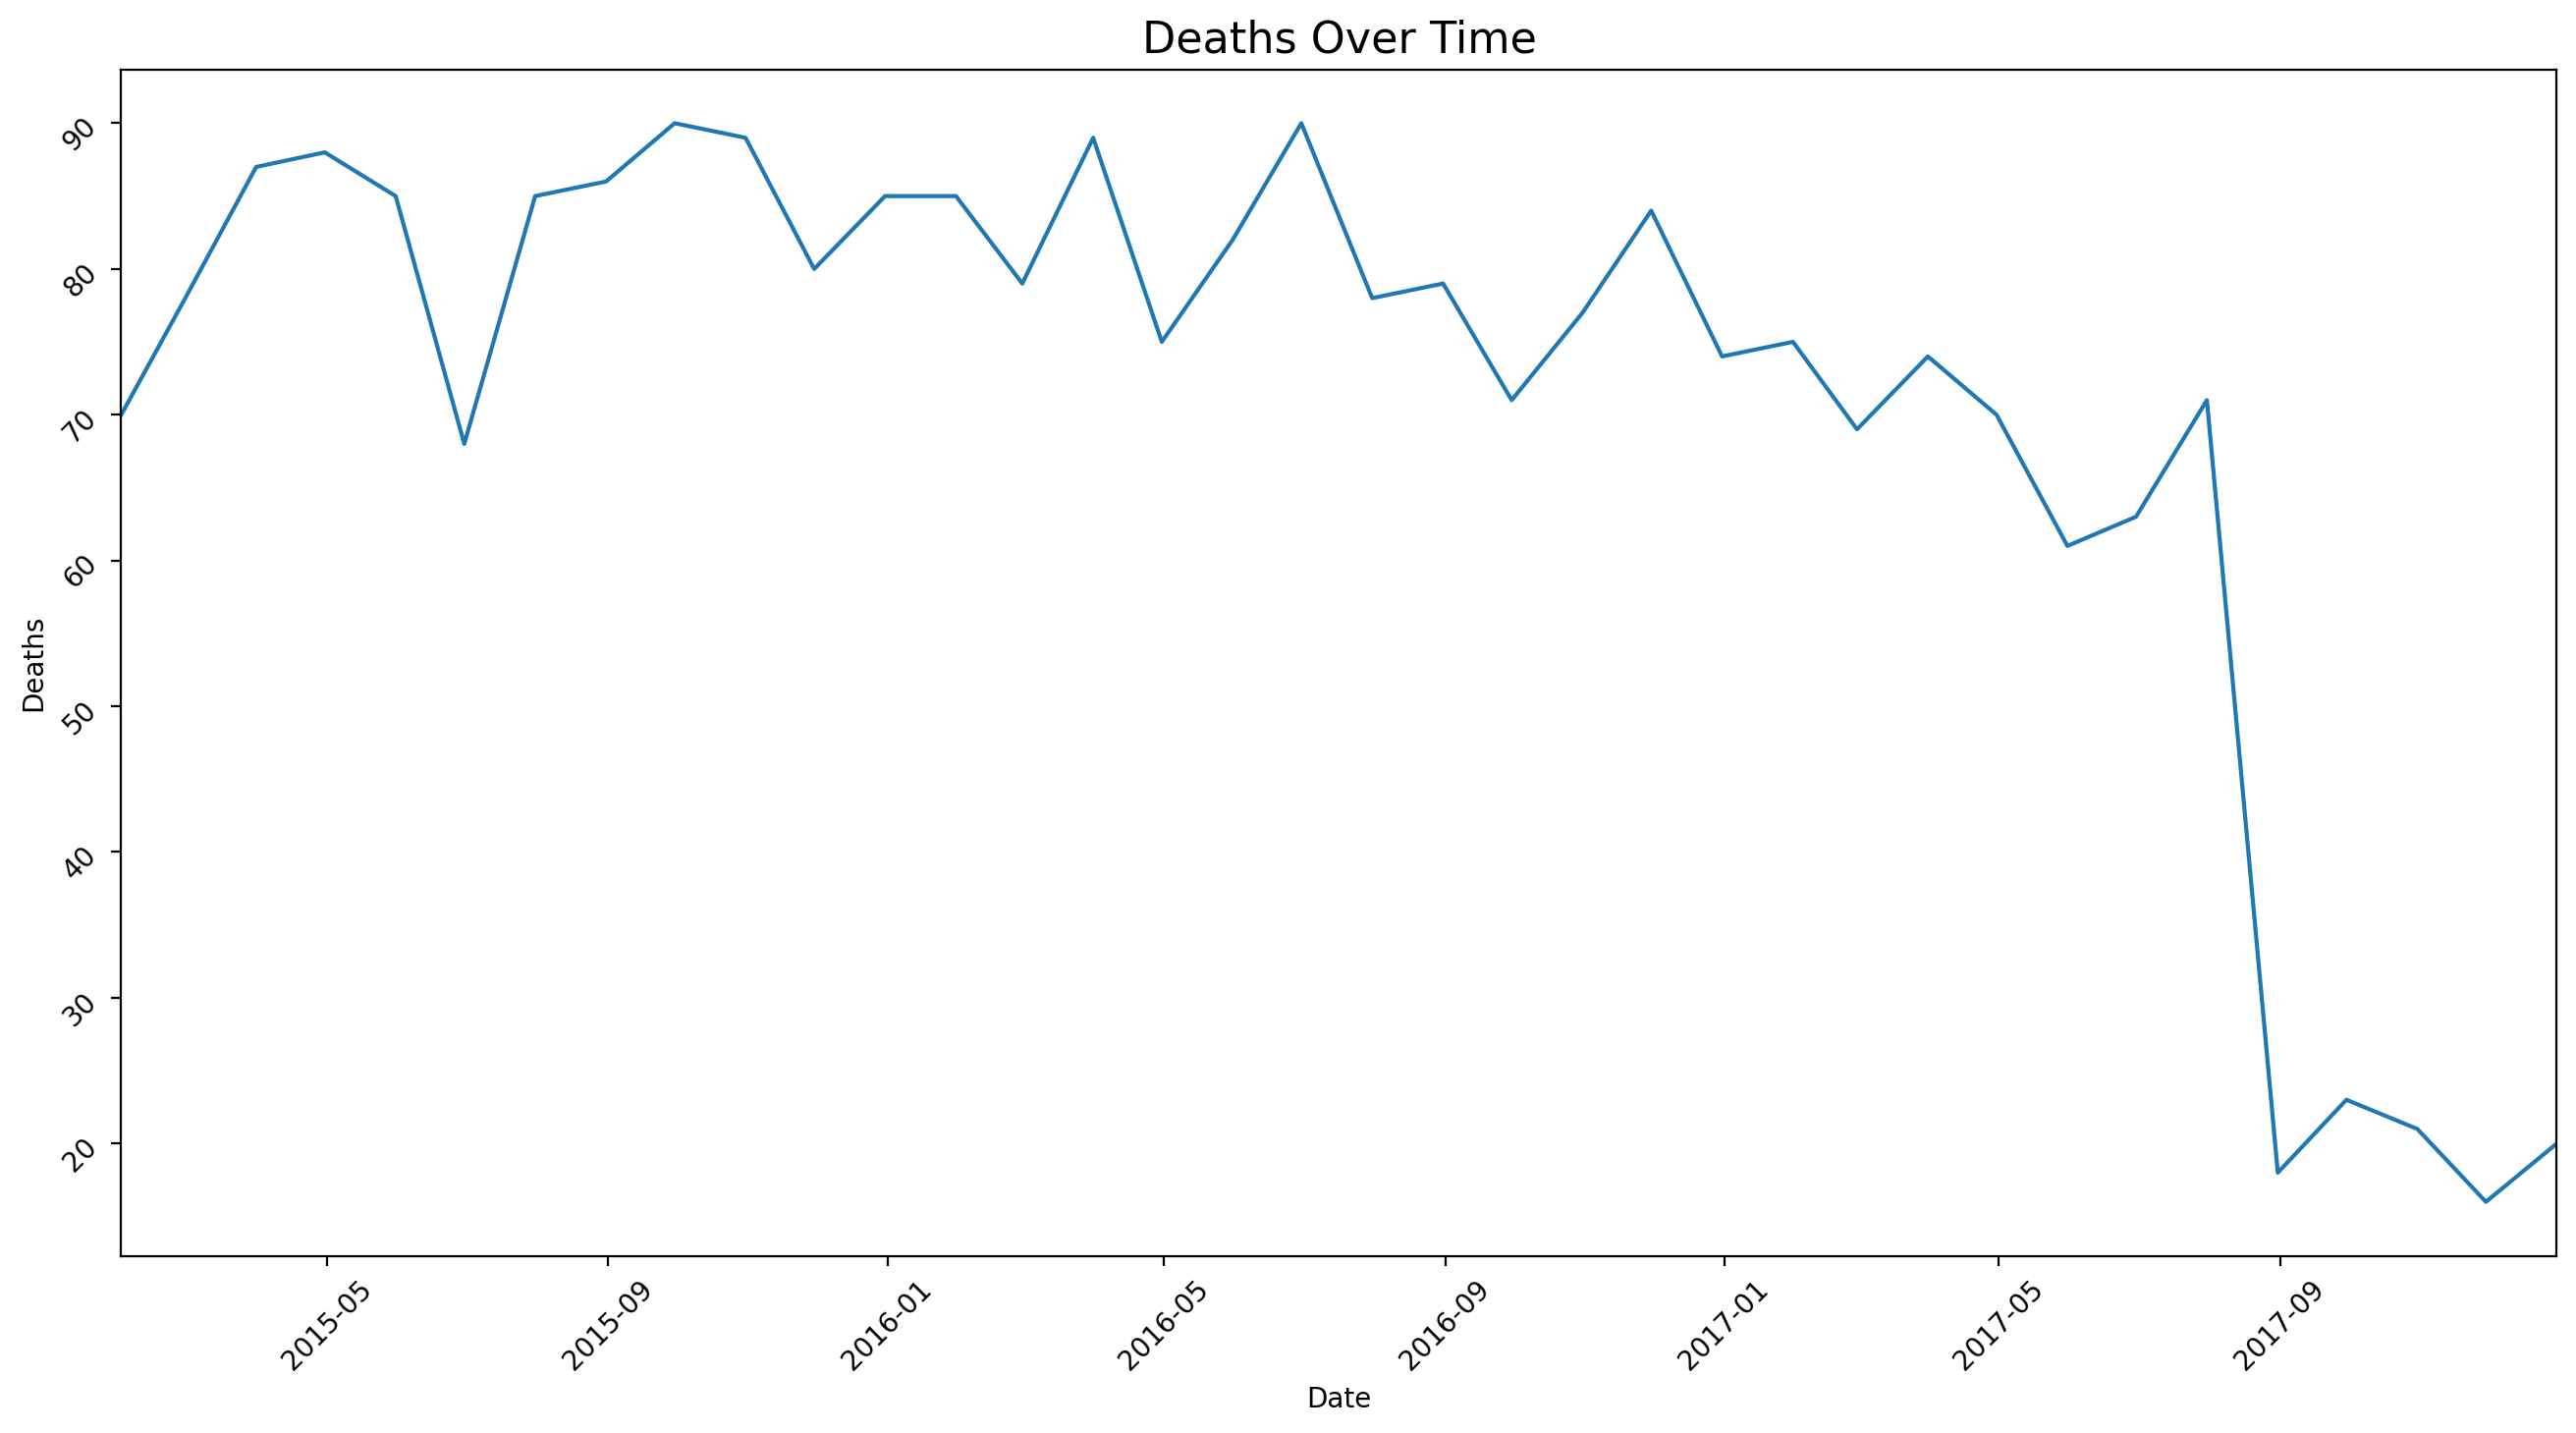

In [30]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Deaths Over Time", fontsize=16)

ax = plt.gca()

ax.tick_params(rotation=45)
ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("Deaths", fontsize=10)
ax.set_xlim([deaths_time_df.index.min(),deaths_time_df.index.max()])

plt.plot(deaths_time_df.index, deaths_time_df.values)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).